# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


%matplotlib inline

df = pd.read_csv("SINASC_RO_2019.csv")
df

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,1,2604388.0,510340,1,32,2.0,12 anos ou mais,333115.0,1.0,0.0,...,5,2767632,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915
27024,1,2752654.0,510675,1,19,1.0,8 a 11 anos,999992.0,0.0,0.0,...,5,2772678,ATIVO,MUNIC,Chupinguaia,Rondônia,-12.55684,-60.90185,340.0,5126.723
27025,1,9659366.0,510787,1,24,2.0,8 a 11 anos,421125.0,0.0,1.0,...,5,2776905,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915
27026,1,9659366.0,510787,1,21,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2777105,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [3]:
df['APGAR5'].fillna(10)

bins = [0,3,5,7,10]

labels = [
    'asfixia grave',
    'asfixia moderada',
    'asfixia leve',
    'normal'
]

df['APGAR5'] = pd.cut(df['APGAR5'], bins=bins, labels=labels, include_lowest=True)
df[['APGAR5']].head(999)

,APGAR5
0,normal
1,normal
2,normal
3,normal
4,normal
...,...
994,normal
995,normal
996,normal
997,normal


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

In [4]:
#Pelo que entendi do exercício, vi que há uma necessidade de categorizar o tempo de gestação em forma numérica pro gráfico
#dar certo. Daí usei aquele dicionário que veio com a base para isso
df['GESTACAO'].replace({'Menos de 22 semanas': 1, 
                        '22 a 27 semanas': 2, 
                        '28 a 31 semanas': 3, 
                        '32 a 36 semanas': 4,
                        '37 a 41 semanas': 5,
                        '42 semanas e mais': 6,
                        'Ignorado':9}, inplace=True)

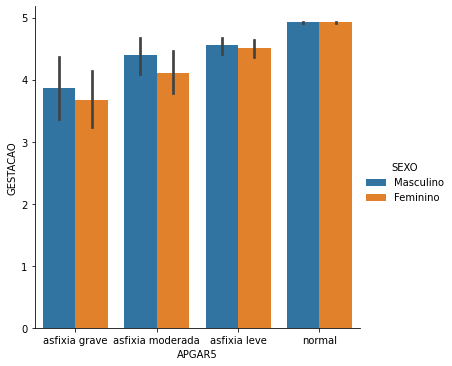

In [5]:
sns.catplot(hue='SEXO', x='APGAR5', y='GESTACAO', kind='bar', data=df)


####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

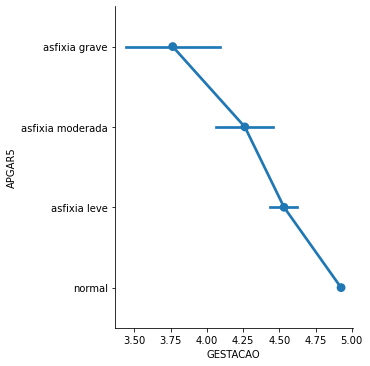

In [6]:
sns.catplot(y='APGAR5', x='GESTACAO', kind='point', data=df)
#Dúvida: como faço para o 'GESTACAO' mostrar os exatos valores discernidos ao invés desses floats?

####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [8]:
Cross = pd.crosstab(df.APGAR5,df.GESTACAO)
CrossP = Cross.div(Cross.sum(axis = 1), axis = 0)
CrossP

GESTACAO,1.0,2.0,3.0,4.0,5.0,6.0
APGAR5,,,,,,
asfixia grave,0.029412,0.308824,0.044118,0.117647,0.485294,0.014706
asfixia moderada,0.000000,0.016393,0.196721,0.311475,0.459016,0.016393
asfixia leve,0.003268,0.039216,0.058824,0.238562,0.640523,0.019608
normal,0.000158,0.002018,0.005104,0.084435,0.880984,0.027301


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

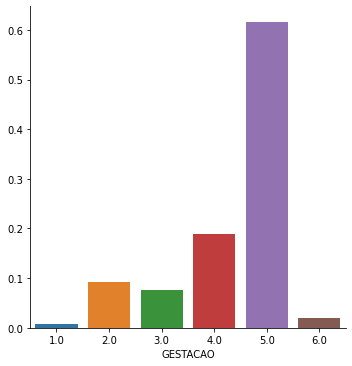

In [12]:
sns.catplot(kind='bar', data=CrossP, ci=False)
#Como majoritariamente partos acontecem com 37 a 41 semanas, pode-se dizer que tudo antes desse período é prematuro.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

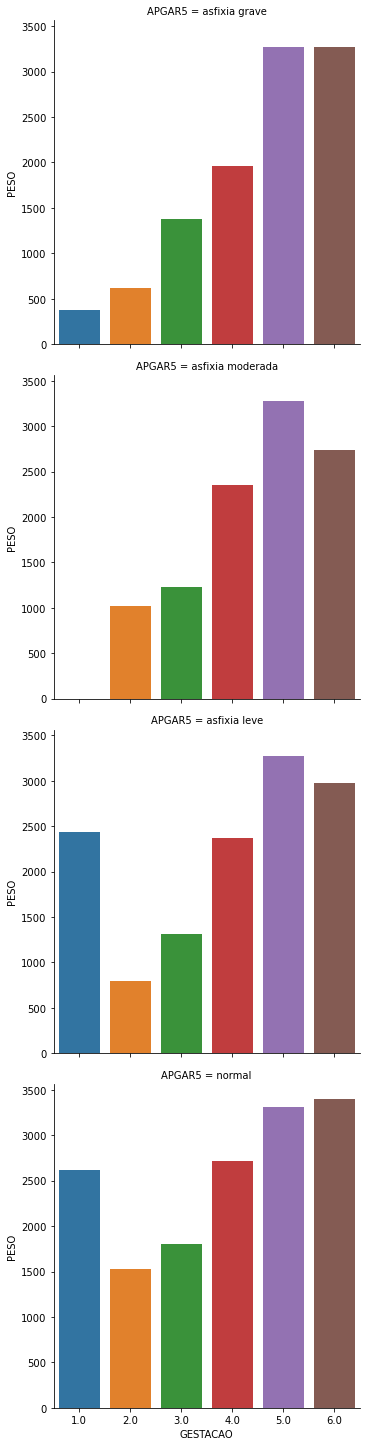

In [21]:
sns.catplot(y = 'PESO',
            row = 'APGAR5',
            x = 'GESTACAO',
            kind = 'bar',
            ci=False,
            data=df
                        )
#Há uma tendência de bebês com o APGAR5 normal, mesmo com menos semanas de gestação serem mais pesados, o que pode levar a hipótese
#De que fatores além do tempo de gestação, como possivelmente doenças pré-natais, são relevantes para o peso da criança e são
#diretamente relacionados ao APGAR5, sendo possivelmente as causas dessas condições de APGAR5.

In [ ]:
#https://github.com/IlsF33/EBAC